## Sentiment Prediction

The notebook presents the solution and approaches and comaparisons there of for a sentiment prediction problem.
Various vectorization methods and machine learning models are compared.

## Data Description

## TRAIN.csv

It contains the training data with review details as described below

Data Dictionary
-----------------------
Variable	 Description

Id----Unique identifier for each tuple

category----The reviews have been categorized into two categories representing positive and negative reviews. 0 represents positive reviews and 1 represents negative reviews.

text-----Tokenized text content of the review


## TEST.csv

It has review details for which to predict whether category would be positive or negative

## RESULTS:
Various models and vectorization techniques are tried.
LogisticRegressionCV with TfidfVectorizer has provided the best result (macro F1_score=0.9385221674876847)

## Import libraries

In [81]:
# For notebook plotting
%matplotlib inline

# Standard packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [82]:
#import skipthoughts
#https://monkeylearn.com/blog/beginners-guide-text-vectorization/

In [83]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [84]:
# sklearn for preprocessing and machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics  import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier,RandomForestRegressor
from xgboost import XGBClassifier                                      
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [86]:
from smart_open import smart_open
from gensim.models import Word2Vec    #Import gensim Word2Fec
from sklearn.decomposition import PCA #Grab PCA functions

## Read the data

In [133]:
#print(os.getcwd())
#os.chdir('./data')
df = pd.read_csv('./TRAIN.csv')

In [89]:
df.head()

,id,text,category
0,3973,1047 6700 4178 2912 183 6700,0
1,4462,4035 4563 1994 154 5373 4956 6035 4393 4017 40...,1
2,2889,5035 7685 3139 4407 254 584 6589 8518 3078,0
3,3457,1047 2540 2578 6700 2242 230 3771 4676 5881 64...,0
4,1555,7685 5868 237 6794 3078,0


In [90]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 3 columns):
id          2598 non-null int64
text        2598 non-null object
category    2598 non-null int64
dtypes: int64(2), object(1)
memory usage: 61.0+ KB


In [91]:
#Check for nulls
df.isna().sum()

id          0
text        0
category    0
dtype: int64

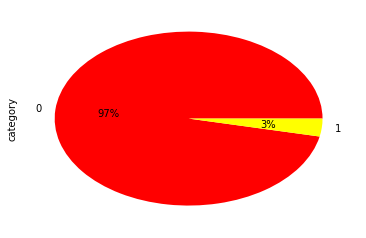

In [92]:
# check the distribution
df.category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [93]:
# we have class imbalances

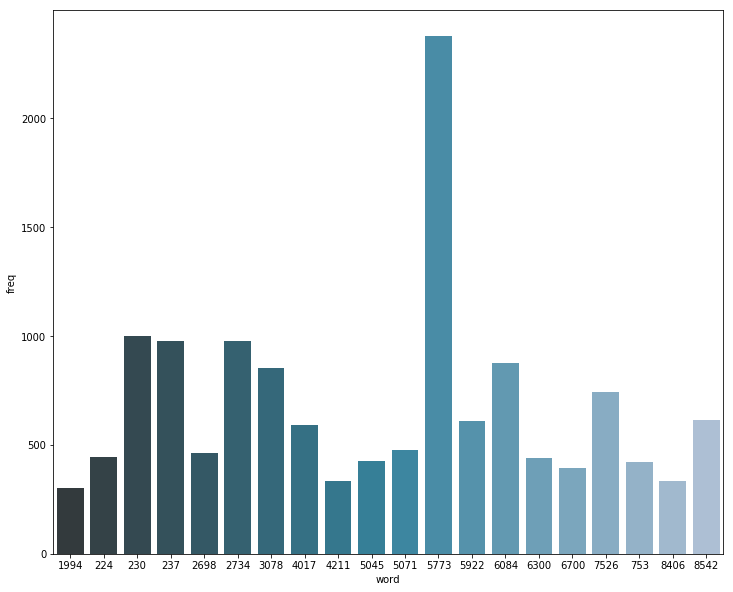

In [94]:
# lets look at the word distribution
import collections
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bow = cv.fit_transform(df['text'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();


In [95]:
#Pre-processing Texts

In [96]:
#Generic function
def preprocess_text(txt):
    txt.lower()
    # Remove urls
    ##txt = re.sub(r"http\S+|www\S+|https\S+", '', twxt, flags=re.MULTILINE) -- not needed for this problem
    # Remove user @ references and '#' from text
    ##txt = re.sub(r'\@\w+|\#','', txt)                                     -- no need for this problem  
    # Remove punctuations
    ##txt = txt.translate(str.maketrans('', '', string.punctuation))        -- no need for this problem   
    # Remove stopwords
    txt_tokens = word_tokenize(txt)   
    filtered_words = [w for w in txt_tokens] 
    
    #ps = PorterStemmer()                                                   
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

# Vectorizing Data           

# Lets try TfidfVectorizer

In [97]:
#Generic function
def get_feature_vector(train_fit):         
    vector = TfidfVectorizer(strip_accents = "unicode", stop_words = "english")
    #vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [98]:
df.head()

,id,text,category
0,3973,1047 6700 4178 2912 183 6700,0
1,4462,4035 4563 1994 154 5373 4956 6035 4393 4017 40...,1
2,2889,5035 7685 3139 4407 254 584 6589 8518 3078,0
3,3457,1047 2540 2578 6700 2242 230 3771 4676 5881 64...,0
4,1555,7685 5868 237 6794 3078,0


In [99]:
n = df.iloc[:, 1]
n.head()

0                         1047 6700 4178 2912 183 6700
1    4035 4563 1994 154 5373 4956 6035 4393 4017 40...
2           5035 7685 3139 4407 254 584 6589 8518 3078
3    1047 2540 2578 6700 2242 230 3771 4676 5881 64...
4                              7685 5868 237 6794 3078
Name: text, dtype: object

In [100]:
n = df.iloc[:, 1]
n.head()

0                         1047 6700 4178 2912 183 6700
1    4035 4563 1994 154 5373 4956 6035 4393 4017 40...
2           5035 7685 3139 4407 254 584 6589 8518 3078
3    1047 2540 2578 6700 2242 230 3771 4676 5881 64...
4                              7685 5868 237 6794 3078
Name: text, dtype: object

## PUT everything together

In [101]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier,GradientBoostingClassifier#StackingC#lassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier,RidgeClassifierCV,SGDClassifier,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
tf_vector = get_feature_vector(np.array(df.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(df.iloc[:, 1]).ravel())
y = np.array(df.iloc[:, 2]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

NB_model = RidgeClassifierCV()
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)
#print('test...',y_test)
#print('predict...',y_predict_nb)
print('accuracy',accuracy_score(y_test, y_predict_nb))
print("F1 Score = " ,f1_score(y_test, y_predict_nb,average='macro'))

('accuracy', 0.9923076923076923)
('F1 Score = ', 0.9146981627296588)


# Results with TfidfVectorizer

In [ ]:
PassiveAggressiveClassifier:
    ('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847)

MLPClassifier:
    ('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847)

SGDClassifier:
   ('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847)  
LogisticRegressionCV:               [same result with all-solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’]
    ('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847)

RidgeClassifierCV:
    ('accuracy', 0.9923076923076923)
('F1 Score = ', 0.9146981627296588)
LinearSVC :
    ('accuracy', 0.9903846153846154)
    ('F1 Score = ', 0.8888461374032748)
KNeighborsClassifier:
    ('accuracy', 0.9903846153846154)
('F1 Score = ', 0.8888461374032748)

RidgeClassifier:
    ('accuracy', 0.9903846153846154)
('F1 Score = ', 0.8888461374032748)

GradientBoostingClassifier:
    ('accuracy', 0.9884615384615385)
    ('F1 Score = ', 0.8720472440944882)
BaggingClassifier:
    ('accuracy', 0.9865384615384616)
    ('F1 Score = ', 0.856551724137931)
DecisionTreeClassifier:
    ('accuracy', 0.9826923076923076)
    ('F1 Score = ', 0.8403765476312288)

ExtraTreesClassifier:
    ('accuracy', 0.9846153846153847)
('F1 Score = ', 0.8142525450973388)

RandomForestClassifier:
 ('accuracy', 0.9826923076923076)
('F1 Score = ', 0.758750451054178)

LogisticRegression:
    ('accuracy', 0.9730769230769231)
('F1 Score = ', 0.49317738791423)
BernoulliNB:
    ('accuracy', 0.9730769230769231)
('F1 Score = ', 0.49317738791423)
MultinomialNB:
    ('accuracy', 0.9730769230769231)
('F1 Score = ', 0.49317738791423)

#Conclusion:
#PassiveAggressiveClassifier, MLPClassifier, SGDClassifier, LogisticRegressionCV are giving the higest F_score

# Lets try CountVectorizer

In [102]:
def get_feature_vector_cv(train_fit):         
    #vector = Word2Vec(train_fit, min_count=1)
    vector=  CountVectorizer(analyzer='word')
    vector.fit(train_fit)
    return vector

In [103]:
tf_vector = get_feature_vector_cv(np.array(df.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(df.iloc[:, 1]).ravel())
y = np.array(df.iloc[:, 2]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# Training Naive Bayes model
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict_nb = model.predict(X_test)
#print('test...',y_test)
#print('predict...',y_predict_nb)
print('accuracy',accuracy_score(y_test, y_predict_nb))
print("F1 Score = " ,f1_score(y_test, y_predict_nb,average='macro'))

('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847)


# Results with CountVectorizer:

In [ ]:
PassiveAggressiveClassifier:
('accuracy', 0.9923076923076923)
('F1 Score = ', 0.9146981627296588)
MLPClassifier:
('accuracy', 0.9923076923076923)
('F1 Score = ', 0.9146981627296588)
SGDClassifier:
('accuracy', 0.9884615384615385)
('F1 Score = ', 0.8898927159796726)
LogisticRegressionCV:               [same result with all-solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’]
('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847) [ Same for tfidf and count, and same as LogisticRegression]
RidgeClassifierCV:
('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847)
LinearSVC :
('accuracy', 0.9923076923076923)
('F1 Score = ', 0.9211045364891519)
KNeighborsClassifier:
('accuracy', 0.9730769230769231)
('F1 Score = ', 0.49317738791423)
RidgeClassifier:
('accuracy', 0.9730769230769231)
('F1 Score = ', 0.49317738791423)
GradientBoostingClassifier:
   ('accuracy', 0.9826923076923076)
('F1 Score = ', 0.7999230473258946)
BaggingClassifier:
('accuracy', 0.9807692307692307)
('F1 Score = ', 0.7678156813716734)
DecisionTreeClassifier:
('accuracy', 0.9807692307692307)
('F1 Score = ', 0.8283828382838283)
ExtraTreesClassifier:
('accuracy', 0.9846153846153847)
('F1 Score = ', 0.7960784313725491)
RandomForestClassifier:
('accuracy', 0.9769230769230769)
('F1 Score = ', 0.619140625)
LogisticRegression:                      1 0.85
('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847)
BernoulliNB:
('accuracy', 0.9730769230769231)
('F1 Score = ', 0.49317738791423)
MultinomialNB:
('accuracy', 0.9826923076923076)
('F1 Score = ', 0.8591676446691342)    

In [ ]:
# RidgeClassifierCV LogisticRegressionCV,LogisticRegression are giving the higest F_score with CountVectorization

## LETS try with the test data

In [104]:
df_test = pd.read_csv('./TEST.csv')

In [105]:
df_test.head()

,id,text
0,1546,5222 7526 427 4829 7526 1164 4768 997 7924 332...
1,2956,590 983 5773 8352 1803 237 5045 6300 6267 5773...
2,4248,5915 4871 2982 6310 2734 3581 5773 6498 5773
3,4403,5435 1994 7248 1944 4017 3567 8618 5018 6619 3...
4,2097,6666 230 4768 2684 5773 3656 907 5922 2295 577...


In [106]:
X_tst = tf_vector.transform(np.array(df_test.iloc[:, 1]).ravel())

In [67]:
Y_predict=model.predict(X_tst)

In [68]:
#submission = pd.DataFrame(Y_predict,columns=['category'])
#submission = pd.concat([Id,prediction['y']],1)

#submission.to_csv('../data/submission.csv',index=False)

In [ ]:
# LETS try Smote to take care of class imbalance: we will only consider tf tokinzer henceforth.
# And only consider subset of models that are giving better scores.
# PassiveAggressiveClassifier, MLPClassifier, SGDClassifier, LogisticRegressionCV are giving the higest F_score

In [115]:
from imblearn.over_sampling import SMOTE

In [116]:
tf_vector = get_feature_vector(np.array(df.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(df.iloc[:, 1]).ravel())
y = np.array(df.iloc[:, 2]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


In [121]:
#Initialising a SMOTE object
smote = SMOTE(random_state=12,ratio=1.0)

#Sampling the data using SMOTE
X_sample_2, y_sample_2 = smote.fit_sample(X_train, y_train)


D:\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [130]:
import xgboost as xgb
from xgboost import XGBClassifier

NB_model = XGBClassifier()#LogisticRegressionCV()
NB_model.fit(X_sample_2, y_sample_2)
y_predict_nb = NB_model.predict(X_test)
#print('test...',y_test)
#print('predict...',y_predict_nb)
print('accuracy',accuracy_score(y_test, y_predict_nb))
print("F1 Score = " ,f1_score(y_test, y_predict_nb,average='macro'))

('accuracy', 0.9884615384615385)
('F1 Score = ', 0.8898927159796726)


D:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [132]:
submission = pd.DataFrame(Y_predict,columns=['category'])
submission.to_csv('../data/submission.csv',index=False)

In [ ]:
# No improvement with smote!

## RESULT
## We declare LogisticRegressionCV with TfidfVectorizer as a winner!

## Final 'accuracy'               : 0.9942307692307693
## Final 'F1 Score (macro)'  :0.9385221674876847


## Scope for future
# Try word2wec,skipthoughts
# Try NN models
